In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("data/1976-2020-president.csv")
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [4]:
rows, cols = df.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 4287
Columns: 15


Each row corresponds to a specifc candidates performance in a particular state in a particular year. Let's begin by filtering out candidates that received less than 5% of the states votes.

In [5]:
df = df[df['candidatevotes'] / df['totalvotes'] > 0.05]
df.shape

(1383, 15)

To begin our exploration of the data, let's focus our attention on the 2020 presidential election. 

In [6]:
recent = df[df['year'] == 2020].copy()
recent.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT
3745,2020,ALASKA,AK,2,94,81,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,189951,359530,20210113,NaN,REPUBLICAN
3752,2020,ARIZONA,AZ,4,86,61,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1672143,3387326,20210113,NaN,DEMOCRAT


Next, let's add a column indicating if the candidate actually one or not.

In [7]:
max_votes_received = recent.groupby('state')['candidatevotes'].max()
max_votes_received 

state
ALABAMA                  1441170
ALASKA                    189951
ARIZONA                  1672143
ARKANSAS                  760647
CALIFORNIA              11110250
COLORADO                 1804352
CONNECTICUT              1080831
DELAWARE                  296268
DISTRICT OF COLUMBIA      317323
FLORIDA                  5668731
GEORGIA                  2473633
HAWAII                    366130
IDAHO                     554119
ILLINOIS                 3471915
INDIANA                  1729519
IOWA                      897672
KANSAS                    771406
KENTUCKY                 1326646
LOUISIANA                1255776
MAINE                     435072
MARYLAND                 1985023
MASSACHUSETTS            2382202
MICHIGAN                 2804040
MINNESOTA                1717077
MISSISSIPPI               756764
MISSOURI                 1718736
MONTANA                   343602
NEBRASKA                  556846
NEVADA                    703486
NEW HAMPSHIRE             424921
NEW 

In [8]:
recent['state_max_votes'] = recent['state'].map(max_votes_received)
recent['won'] = recent['candidatevotes'] == recent['state_max_votes']
recent.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,state_max_votes,won
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT,1441170,False
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN,1441170,True
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT,189951,False
3745,2020,ALASKA,AK,2,94,81,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,189951,359530,20210113,NaN,REPUBLICAN,189951,True
3752,2020,ARIZONA,AZ,4,86,61,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1672143,3387326,20210113,NaN,DEMOCRAT,1672143,True


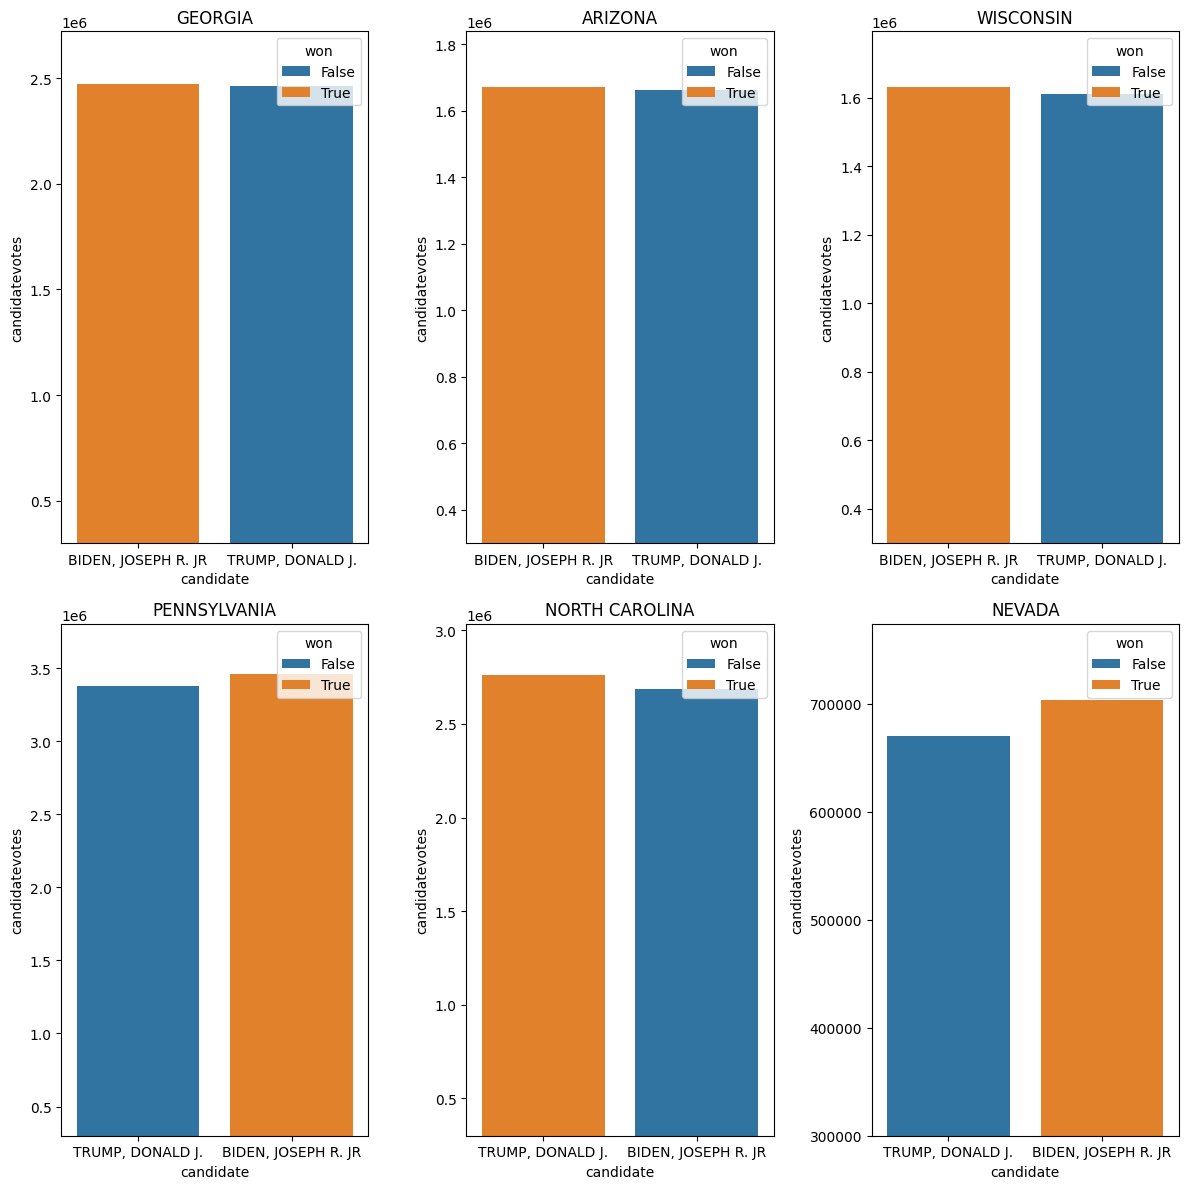

In [26]:
tight_states = ['GEORGIA', 'ARIZONA', 'WISCONSIN', 'PENNSYLVANIA', 'NORTH CAROLINA', 'NEVADA']
# make a 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(12, 13))

for i, state in enumerate(tight_states):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    state_data = recent[recent['state'] == state]
    sns.barplot(data=state_data, x='candidate', y='candidatevotes', hue='won', ax=ax)
    ax.set_title(state)
    # ax.set_yscale('log')  # Apply log scale to the y-axis
    ax.set_ylim(3*1e5, state_data['candidatevotes'].max() * 1.1)  # Set y-axis limits to start from 1

plt.tight_layout()
plt.show()

In [9]:
wins = recent[recent['won'] == True]
wins.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,state_max_votes,won
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN,1441170,True
3745,2020,ALASKA,AK,2,94,81,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,189951,359530,20210113,NaN,REPUBLICAN,189951,True
3752,2020,ARIZONA,AZ,4,86,61,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1672143,3387326,20210113,NaN,DEMOCRAT,1672143,True
3771,2020,ARKANSAS,AR,5,71,42,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,760647,1219069,20210113,NaN,REPUBLICAN,760647,True
3773,2020,CALIFORNIA,CA,6,93,71,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,11110250,17500881,20210113,NaN,DEMOCRAT,11110250,True


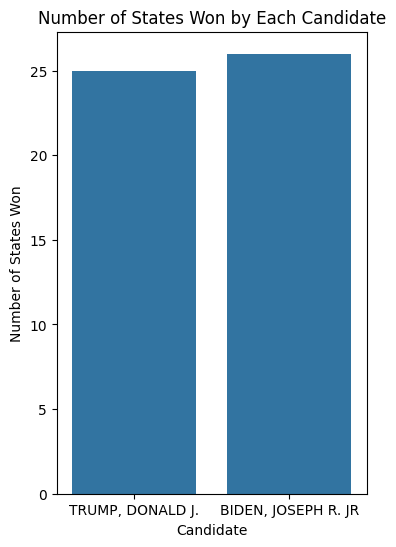

In [10]:
# plot bar chart showing num states won for each candidate
fig, ax = plt.subplots(figsize=(4, 6))
sns.countplot(x='candidate', data=wins, ax=ax)
ax.set_title('Number of States Won by Each Candidate')
ax.set_xlabel('Candidate')
ax.set_ylabel('Number of States Won')
plt.show()

In [12]:
df['state'].value_counts()

state
ALASKA                  31
VERMONT                 29
COLORADO                29
MONTANA                 29
WYOMING                 28
OREGON                  28
NORTH DAKOTA            28
NEW MEXICO              28
MINNESOTA               28
MASSACHUSETTS           28
SOUTH DAKOTA            28
MAINE                   28
UTAH                    28
RHODE ISLAND            28
IDAHO                   28
HAWAII                  28
VIRGINIA                27
NEVADA                  27
PENNSYLVANIA            27
ARIZONA                 27
OKLAHOMA                27
OHIO                    27
WISCONSIN               27
NEW YORK                27
CALIFORNIA              27
NEW JERSEY              27
NEW HAMPSHIRE           27
NEBRASKA                27
IOWA                    27
CONNECTICUT             27
DELAWARE                27
MICHIGAN                27
FLORIDA                 27
WASHINGTON              27
ILLINOIS                27
KANSAS                  27
MARYLAND              

In [13]:
electoral_votes = {
    'ALABAMA': 9,
    'ALASKA': 3,
    'ARIZONA': 11,
    'ARKANSAS': 6,
    'CALIFORNIA': 54,
    'COLORADO': 10,
    'CONNECTICUT': 7,
    'DELAWARE': 3,
    'DISTRICT OF COLUMBIA': 3,
    'FLORIDA': 30,
    'GEORGIA': 16,
    'HAWAII': 4,
    'IDAHO': 4,
    'ILLINOIS': 19,
    'INDIANA': 11,
    'IOWA': 6,
    'KANSAS': 6,
    'KENTUCKY': 8,
    'LOUISIANA': 8,
    'MAINE': 4,
    'MARYLAND': 10,
    'MASSACHUSETTS': 11,
    'MICHIGAN': 15,
    'MINNESOTA': 10,
    'MISSISSIPPI': 6,
    'MISSOURI': 10,
    'MONTANA': 4,
    'NEBRASKA': 5,
    'NEVADA': 6,
    'NEW HAMPSHIRE': 4,
    'NEW JERSEY': 14,
    'NEW MEXICO': 5,
    'NEW YORK': 28,
    'NORTH CAROLINA': 16,
    'NORTH DAKOTA': 3,
    'OHIO': 17,
    'OKLAHOMA': 7,
    'OREGON': 8,
    'PENNSYLVANIA': 19,
    'RHODE ISLAND': 4,
    'SOUTH CAROLINA': 9,
    'SOUTH DAKOTA': 3,
    'TENNESSEE': 11,
    'TEXAS': 40,
    'UTAH': 6,
    'VERMONT': 3,
    'VIRGINIA': 13,
    'WASHINGTON': 12,
    'WEST VIRGINIA': 4,
    'WISCONSIN': 10,
    'WYOMING': 3
}

df['electoral_votes'] = df['state'].map(electoral_votes)
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,electoral_votes
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,9
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,9
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,3
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,3
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3


In [27]:
tight_states = ['GEORGIA', 'ARIZONA', 'WISCONSIN', 'PENNSYLVANIA']
# plot pie chart of each states vote totals from 2020 election stored in recent df
# fig, ax = plt.subplots(figsize=(10, 10))

df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,electoral_votes
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,9
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,9
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,3
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,3
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3


In [32]:
max_votes = df.loc[:, ['year', 'state', 'candidatevotes']].groupby(['year', 'state']).max()

In [36]:
max_votes.loc[1976].loc['COLORADO'].values[0]

np.int64(584278)

In [37]:
winning_candidate = []
for idx, row in df.iterrows():
    year, state = row['year'], row['state']
    m = max_votes.loc[year].loc[state]
    if row['candidatevotes'] == m.values[0]:
        winning_candidate.append(1)
    else:
        winning_candidate.append(0)
        
df['won'] = winning_candidate
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,electoral_votes,won
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,9,1
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,9,0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,3,1
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,3,0
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3,0


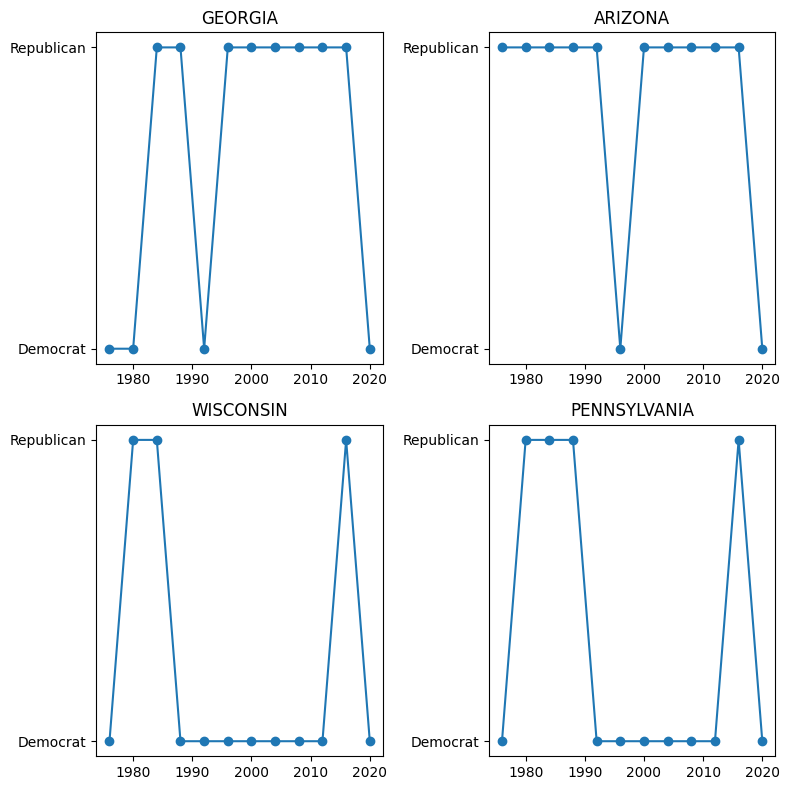

In [40]:
years = list(range(1976, 2024, 4))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, state in enumerate(tight_states):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    state_data = df[df['state'] == state]
    state_results = []
    for year in years:
        year_data = state_data[state_data['year'] == year]
        if len(year_data) == 0:
            continue
        winner = year_data[year_data['won'] == True]
        if winner['party_detailed'].values[0] == 'REPUBLICAN':
            state_results.append(1)
        elif winner['party_detailed'].values[0] == 'DEMOCRAT':
            state_results.append(-1)
        else:
            print("Error...")
    
    ax.plot(years[:len(state_results)], state_results, marker='o')
    ax.set_title(state)
    ax.set_ylim(-1.1, 1.1)
    ax.set_yticks([-1, 1])
    ax.set_yticklabels(['Democrat', 'Republican'])
    
plt.tight_layout()    
    

In [41]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,electoral_votes,won
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,9,1
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,9,0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,3,1
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,3,0
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3,0


In [48]:
dem_perf = []
rep_perf = []
for i in range(1976, 2024, 4):
    year_data = df[df['year'] == i]
    dem_year = year_data.loc[year_data['party_detailed'] == 'DEMOCRAT'].loc[year_data['won'] == True, 'electoral_votes'].sum()
    rep_year = year_data.loc[year_data['party_detailed'] == 'REPUBLICAN'].loc[year_data['won'] == True, 'electoral_votes'].sum()
    dem_perf.append(dem_year)
    rep_perf.append(rep_year)

dem_perf, rep_perf

([np.int64(292),
  np.int64(79),
  np.int64(13),
  np.int64(100),
  np.int64(353),
  np.int64(364),
  np.int64(239),
  np.int64(232),
  np.int64(356),
  np.int64(319),
  np.int64(232),
  np.int64(303)],
 [np.int64(246),
  np.int64(459),
  np.int64(525),
  np.int64(438),
  np.int64(185),
  np.int64(174),
  np.int64(289),
  np.int64(296),
  np.int64(182),
  np.int64(209),
  np.int64(306),
  np.int64(235)])

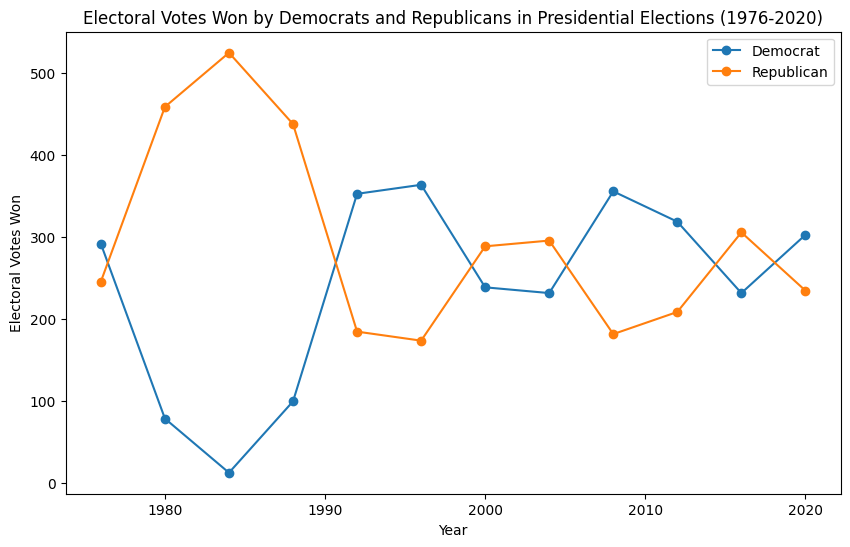

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, dem_perf, marker='o', label='Democrat')
ax.plot(years, rep_perf, marker='o', label='Republican')
ax.set_xlabel('Year')
ax.set_ylabel('Electoral Votes Won')
ax.set_title('Electoral Votes Won by Democrats and Republicans in Presidential Elections (1976-2020)')
ax.legend()
plt.show()

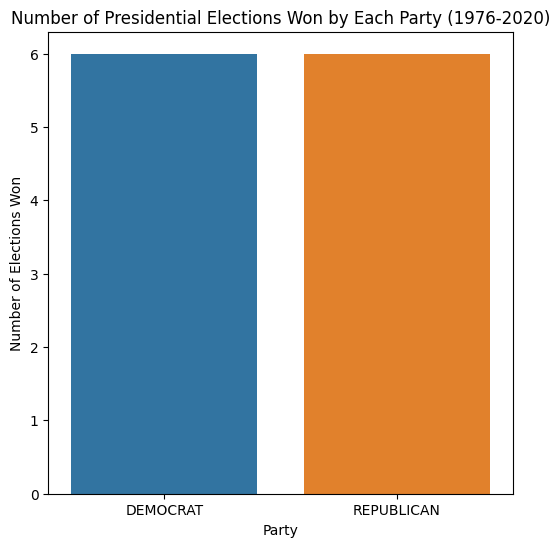

In [52]:
who_won = []
for d, r in zip(dem_perf, rep_perf):
    if d > r:
        who_won.append('DEMOCRAT')
    else:
        who_won.append('REPUBLICAN')
dem_wins = len([x for x in who_won if x == 'DEMOCRAT'])
rep_wins = len([x for x in who_won if x == 'REPUBLICAN'])

fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x=who_won, ax=ax, hue=who_won)
ax.set_title('Number of Presidential Elections Won by Each Party (1976-2020)')
ax.set_xlabel('Party')
ax.set_ylabel('Number of Elections Won')
plt.show()


In [47]:
df['pct_votes'] = df['candidatevotes'] / df['totalvotes']

party_perf = df.loc[:, ['year', 'state', 'party_detailed', 'pct_votes']].groupby(['year', 'state', 'party_detailed']).max()
party_perf

pct_votes
year state         party_detailed           
1976 ALABAMA       DEMOCRAT         0.557273
                   REPUBLICAN       0.426149
     ALASKA        DEMOCRAT         0.356531
                   LIBERTARIAN      0.054906
                   REPUBLICAN       0.579046
...                                      ...
2020 WEST VIRGINIA REPUBLICAN       0.686316
     WISCONSIN     DEMOCRAT         0.494495
                   REPUBLICAN       0.488224
     WYOMING       DEMOCRAT         0.263879
                   REPUBLICAN       0.694998

[1382 rows x 1 columns]

In [46]:
dem_perf = []
rep_perf = []
for i in range(1976, 2024, 4):
    d = party_perf.loc[i].loc['DEMOCRAT'].values[0]
    dem_perf.append(d)
    r = party_perf.loc[i].loc['REPUBLICAN'].values[0]
    rep_perf.append(r)

dem_perf

KeyError: 'DEMOCRAT'